<a href="https://colab.research.google.com/github/lukasfebri015/Semester4/blob/main/PenelitianPolaTulisanTangan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

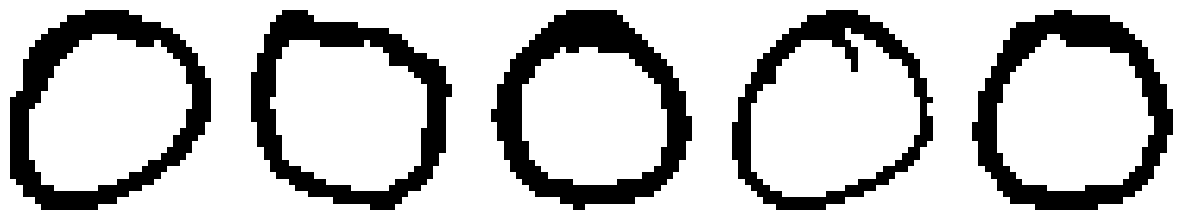

In [ ]:
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Membuka file zip
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    # Mendapatkan daftar file dalam zip
    file_list = zip_ref.namelist()

    # Menampilkan 5 gambar pertama secara berjejer ke kanan
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))

    for i in range(5):
        # Membuka file gambar dari zip
        with zip_ref.open(file_list[i]) as image_file:
            # Membaca data gambar
            img = mpimg.imread(image_file)

            # Menampilkan gambar
            axes[i].imshow(img)
            axes[i].axis('off')

    plt.show()

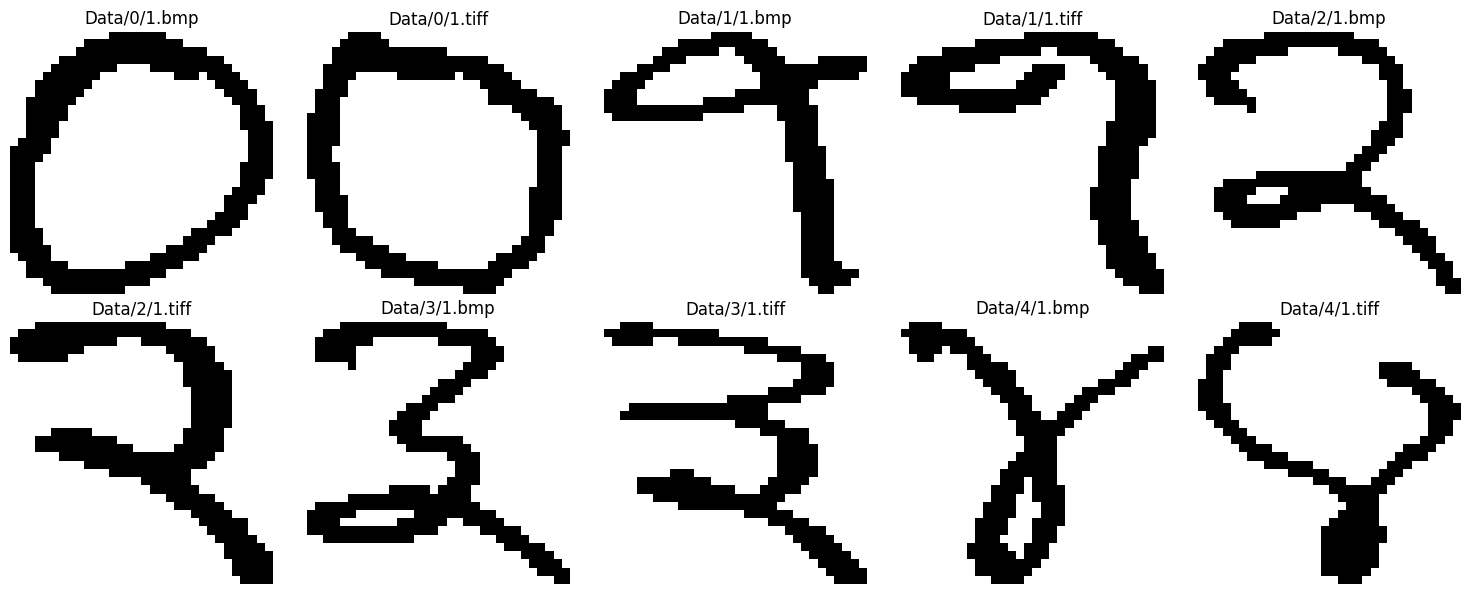

In [5]:
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Membuka file zip
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    # Mendapatkan daftar direktori dalam zip
    dir_list = sorted(set([os.path.dirname(name) for name in zip_ref.namelist()]))

    # Menampilkan 10 gambar secara bergantian dari setiap direktori
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for i, directory in enumerate(dir_list):
        # Mendapatkan daftar file dalam direktori
        file_list = [name for name in zip_ref.namelist() if os.path.dirname(name) == directory]

        # Menampilkan gambar dari direktori
        for j in range(2):
            if i * 2 + j < 10:
                # Membuka file gambar dari zip
                with zip_ref.open(file_list[j]) as image_file:
                    # Membaca data gambar
                    img = mpimg.imread(image_file)

                    # Menampilkan gambar
                    axes[i * 2 + j].imshow(img)
                    axes[i * 2 + j].set_title(file_list[j])
                    axes[i * 2 + j].axis('off')

    plt.tight_layout()
    plt.show()

Epoch 1/10
29/29 [==============================] - 3s 55ms/step - loss: 1.6245 - accuracy: 0.5324 - val_loss: 0.4373 - val_accuracy: 0.9052
Epoch 2/10
29/29 [==============================] - 2s 65ms/step - loss: 0.2518 - accuracy: 0.9298 - val_loss: 0.1941 - val_accuracy: 0.9224
Epoch 3/10
29/29 [==============================] - 2s 65ms/step - loss: 0.1118 - accuracy: 0.9698 - val_loss: 0.1328 - val_accuracy: 0.9569
Epoch 4/10
29/29 [==============================] - 1s 40ms/step - loss: 0.0598 - accuracy: 0.9827 - val_loss: 0.1271 - val_accuracy: 0.9612
Epoch 5/10
29/29 [==============================] - 1s 43ms/step - loss: 0.0373 - accuracy: 0.9914 - val_loss: 0.1111 - val_accuracy: 0.9698
Epoch 6/10
29/29 [==============================] - 2s 66ms/step - loss: 0.0203 - accuracy: 0.9978 - val_loss: 0.0975 - val_accuracy: 0.9698
Epoch 7/10
29/29 [==============================] - 2s 65ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0994 - val_accuracy: 0.9569
Epoch 8/10
29

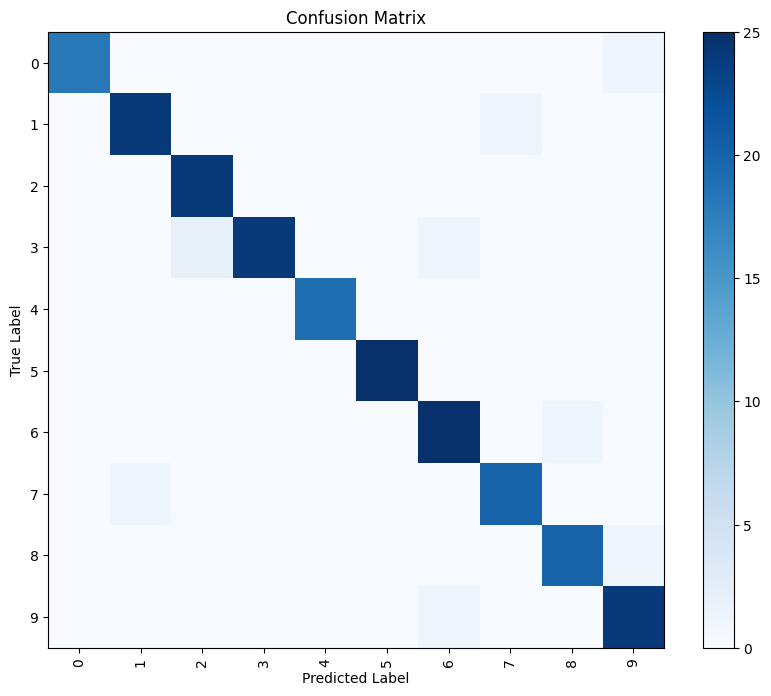

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import zipfile

# Mengekstrak file archive.zip
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_data')

# Membuat daftar file gambar dan label
data_dir = "extracted_data"
files = []
labels = []
for root, dirs, filenames in os.walk(data_dir):
    for filename in filenames:
        file_path = os.path.join(root, filename)
        label = os.path.basename(os.path.normpath(root))
        files.append(file_path)
        labels.append(label)

images = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in files]

# Preproses gambar (misalnya, resize dan normalisasi)
images = [cv2.resize(img, (32, 32)) for img in images]
images = np.array(images) / 255.0
images = np.expand_dims(images, -1)  # Menambahkan dimensi channel

# Membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# One-hot encoding label
from tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(labels))
y_train = to_categorical(np.array([np.where(np.unique(labels) == label)[0][0] for label in y_train]), num_classes)
y_test = to_categorical(np.array([np.where(np.unique(labels) == label)[0][0] for label in y_test]), num_classes)

# Membangun model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Mengevaluasi model pada data uji dan menghasilkan confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)

# Menampilkan confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(num_classes), np.unique(labels), rotation=90)
plt.yticks(np.arange(num_classes), np.unique(labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
import os
import zipfile
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mengekstrak file zip ke direktori sementara
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('temp_dir')

# Menyiapkan data gambar
data_dir = 'temp_dir'
images = []
labels = []

for root, dirs, files in os.walk(data_dir):
    for file in files:
        image_path = os.path.join(root, file)
        image = cv2.imread(image_path)
        images.append(image)
        label = os.path.basename(os.path.dirname(image_path))
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

# Preproses data gambar
image_size = 32
images = [cv2.resize(image, (image_size, image_size)) for image in images]
images = np.array(images) / 255.0  # Normalisasi piksel

# One-hot encoding label
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(label_encoder.classes_)
labels = np.eye(num_classes)[labels]  # One-hot encoding

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Membuat model klasifikasi
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Mengompilasi model
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
epochs = 10
batch_size = 32
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1)
model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/10
29/29 [==============================] - 4s 94ms/step - loss: 1.6859 - accuracy: 0.4870 - val_loss: 0.4231 - val_accuracy: 0.8707
Epoch 2/10
29/29 [==============================] - 3s 110ms/step - loss: 0.6634 - accuracy: 0.7819 - val_loss: 0.1752 - val_accuracy: 0.9440
Epoch 3/10
29/29 [==============================] - 2s 58ms/step - loss: 0.3843 - accuracy: 0.8704 - val_loss: 0.1189 - val_accuracy: 0.9612
Epoch 4/10
29/29 [==============================] - 2s 58ms/step - loss: 0.3054 - accuracy: 0.9006 - val_loss: 0.0958 - val_accuracy: 0.9698
Epoch 5/10
29/29 [==============================] - 3s 95ms/step - loss: 0.2550 - accuracy: 0.9179 - val_loss: 0.0645 - val_accuracy: 0.9784
Epoch 6/10
29/29 [==============================] - 2s 67ms/step - loss: 0.1853 - accuracy: 0.9341 - val_loss: 0.1046 - val_accuracy: 0.9483
Epoch 7/10
29/29 [==============================] - 2s 56ms/step - loss: 0.1791 - accuracy: 0.9428 - val_loss: 0.0333 - val_accuracy: 0.9914
Epoch 8/10
2